In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import pandas as pd
import numpy as np
import torch.utils.data as data_utils
import torch.optim as optim
import matplotlib.pyplot as plt
from torch.utils.data import Dataset
from scipy.spatial import distance
from sklearn.metrics import mean_squared_error

In [2]:
import ipynb.fs.full.my_models as my_models

In [31]:
net3_ped1 = my_models.Net3_ped1()
net3_ped2 = my_models.Net3_ped2()
net3_ped3 = my_models.Net3_ped3()
net3_ped4 = my_models.Net3_ped4()
net3_ped5 = my_models.Net3_ped5()
net3_ped6 = my_models.Net3_ped6()
net3_ped7 = my_models.Net3_ped7()
net3_ped8 = my_models.Net3_ped8()
net3_ped9 = my_models.Net3_ped9()
# print(net3_ped2)

In [32]:
net3_ped_repulse_total = my_models.Net3_ped_repulse_total(net3_ped1, net3_ped2, net3_ped3, net3_ped4, net3_ped5,
                                                net3_ped6, net3_ped7, net3_ped8, net3_ped9)
# print(net3_ped_repulse_total)

In [33]:
net3_attract = my_models.Net3_attract()
# print(net3_attract)

In [34]:
net3_repulse = my_models.Net3_repulse()
# print(net3_repulse)

In [35]:
net3_ped_group = my_models.Net3_ped_group()
# print(net3_ped_group)

In [36]:
path_ped_repulse = "C:/Users/sakif/jupyter projects/thesis_test/modular test/weights/Net3_ped_repulse_total.pth"
path_attract = "C:/Users/sakif/jupyter projects/thesis_test/modular test/weights/net3_attract.pth"
path_repulse = "C:/Users/sakif/jupyter projects/thesis_test/modular test/weights/net3_repulse.pth"
path_group = "C:/Users/sakif/jupyter projects/thesis_test/modular test/weights/net3_ped_group.pth"

In [37]:
net3_ped_repulse_total.load_state_dict(torch.load(path_ped_repulse))
net3_attract.load_state_dict(torch.load(path_attract))
net3_repulse.load_state_dict(torch.load(path_repulse))
net3_ped_group.load_state_dict(torch.load(path_group))

<All keys matched successfully>

In [38]:
net3_complete = my_models.Net3_complete(net3_attract, net3_repulse, net3_ped_repulse_total, net3_ped_group)
# print(net3_complete)

In [39]:
path_net3_complete = "C:/Users/sakif/jupyter projects/thesis_test/modular test/net3_complete2.pth"

In [40]:
net3_complete.load_state_dict(torch.load(path_net3_complete))

<All keys matched successfully>

In [41]:
# print(net3_complete.parameters)

In [42]:
print("no of parameters: ", sum(p.numel() for p in net3_complete.parameters()))

no of parameters:  2073


In [43]:
"""
for p in net3_attract.parameters():
    print(p.shape)
    print(p.numel())
    """

'\nfor p in net3_attract.parameters():\n    print(p.shape)\n    print(p.numel())\n    '

In [44]:
# test_df_path = "C:/Users/sakif/jupyter projects/thesis_test/modular test/Untitled Folder/eth_data_prepared.csv"
# eth_data_prepared_normal.csv
# fps=10

In [45]:
test_df_path = "C:/Users/sakif/jupyter projects/thesis_test/modular test/Untitled Folder/eth_data_prepared_normal3.csv"
# delta_t = 0.4

In [46]:
test_df = pd.read_csv(test_df_path, index_col=None)

In [47]:
test_df.head()

,frame_id,ped_no,pos_x,pos_y,vel_x,vel_y,rotation_angle,eta_group_x,eta_group_y,bound_x,...,n_w_y21,n_w_y22,n_w_y23,n_w_y24,n_w_y25,n_w_y26,n26_y,d_w_bound,n_w_bound_x,n_w_bound_y
0,780,1,8.456844,3.588066,1.671714,0.176292,0.0,0.0,0.0,0.793,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.906774,0.949485,0.313814
1,786,1,9.125530,3.658583,1.662877,0.326723,0.0,0.0,0.0,0.793,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.564877,0.954067,0.299594
2,792,1,9.787146,3.849445,1.683334,0.371084,0.0,0.0,0.0,0.793,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.253295,0.954537,0.298094
3,798,1,10.472197,3.955450,1.598568,0.264795,0.0,0.0,0.0,0.793,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.939286,0.957302,0.289091
4,804,1,11.066000,4.061280,1.574526,0.456390,0.0,0.0,0.0,0.793,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.538544,0.959047,0.283249


In [48]:
from collections import Counter

In [49]:
tempppp = Counter(np.array(test_df['ped_no']))
# tempppp
# 171

In [50]:
# np.unique(np.array(test_df['ped_no']))
# 51: 64

In [51]:
# dataframe for individual pedestrian 
test_df_indiv = test_df.loc[test_df['ped_no'] == 6]
test_df_indiv = test_df_indiv.loc[test_df_indiv['frame_id'] >= 846]

In [52]:
test_df_indiv.head()

,frame_id,ped_no,pos_x,pos_y,vel_x,vel_y,rotation_angle,eta_group_x,eta_group_y,bound_x,...,n_w_y21,n_w_y22,n_w_y23,n_w_y24,n_w_y25,n_w_y26,n26_y,d_w_bound,n_w_bound_x,n_w_bound_y
20,846,6,12.162877,5.748245,-1.220481,0.255205,2.996867,-0.914195,0.405274,0.793,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.759141,0.921504,0.388368
25,852,6,11.674685,5.850327,-1.327312,0.212907,3.159046,-0.937673,0.347519,0.793,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.404888,0.913121,0.407688
30,858,6,11.101028,5.918570,-1.450013,0.073140,3.062494,-0.933087,0.359651,0.793,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.901625,0.902514,0.430661
35,864,6,10.514675,5.908839,-1.378563,-0.029517,2.962117,-0.912653,0.408734,0.793,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.327041,0.892196,0.451648
40,870,6,9.998177,5.894957,-1.344575,0.118118,3.159046,-0.900428,0.435005,0.793,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.839014,0.882292,0.470703


In [53]:
np.array(test_df_indiv['pos_x'])[10]

6.8367453

In [54]:
initial_state2 = np.array([
        [5.0151, 7.03843, -0.552, 0.3000, -1.52195, 6.05168, 0],
        [6.5785, 6.98375, -1.0294, 0.2193, -0.72056, 6.6591, 0],
        [4.5437, 4.69912, 1.7391, -0.10825, 12.2295, 5.51257, 0],
        [4.315, 4.0526, 1.5816, 0.0197, 12.0777, 4.428, 0],
        [6.8367, 6.136, 0.0149, 0.07409, -0.7528, 5.648, 0],

    ])

In [55]:
from matplotlib import pyplot as plt

In [56]:
# for visualizing the forces
# y_plot1 = np.array(test_df_indiv["total_x"])
# y_plot2 = np.array(test_df_indiv["total_y"])

# x_plot = np.linspace(0, 299, num=300)

In [57]:
plot_x = np.array(test_df_indiv["pos_x"])
plot_y = np.array(test_df_indiv["pos_y"])

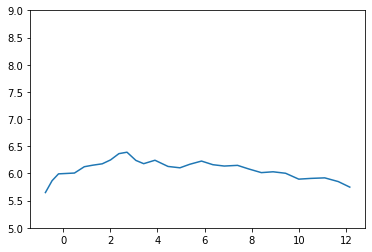

In [58]:
plt.plot(plot_x, plot_y)
# plt.xlim(5, 9)
plt.ylim(5, 9)
plt.show()

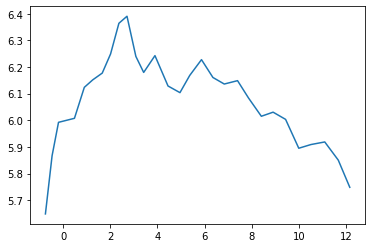

In [59]:
plt.plot(plot_x, plot_y)
# plt.xlim(5, 9)
# plt.ylim(5, 9)
plt.show()

In [60]:
test_df_indiv.columns

Index(['frame_id', 'ped_no', 'pos_x', 'pos_y', 'vel_x', 'vel_y',
       'rotation_angle', 'eta_group_x', 'eta_group_y', 'bound_x',
       ...
       'n_w_y21', 'n_w_y22', 'n_w_y23', 'n_w_y24', 'n_w_y25', 'n_w_y26',
       'n26_y', 'd_w_bound', 'n_w_bound_x', 'n_w_bound_y'],
      dtype='object', length=144)

In [61]:
input_xy = np.array(test_df_indiv[["pos_x", "pos_y"]]).astype('float32')

In [62]:
len(input_xy)

30

In [63]:
input_xy[0]

array([12.162877,  5.748245], dtype=float32)

In [64]:
input_xy.shape

(30, 2)

In [65]:
# concatinating (0, 19) == trajectories, [20, 21] == [e_x, e_y] ,[22, 23, 24] == [dw1, nw_x1, nw_y1], 
        # [25, 26, 27] == [dw2, nw_x2, nw_y2], [28, 29, 30] == [dw3, nw_x3, nw_y3], [31, 32, 33] == [dw4, nw_x4, nw_y4]
        # [34, 35, 36] == [dw5, nw_x5, nw_y5], [37, 38, 39] == [dw6, nw_x6, nw_y6], [40, 41, 42] == [dw7, nw_x7, nw_y7]
        # [43, 44, 45] == [dw8, nw_x8, nw_y8], [46, 47, 48] == [dw9, nw_x9, nw_y9]
        # [49, 50, 51] == [dw_b, nw_x_b, nw_y_b], [52, 53] == [centroid, angle]
        #  e, x_attract1, x_attract2, x_bound, x1, x2, x3, x4, x5, x6, x7, x8, x9, x_group, x_speed

In [66]:
# torch.cat((temp_input2, temp_input), axis=1)

In [67]:
from scipy.interpolate import interp1d

def input_interpolated(temp_xy):
    # takes the 3 timesteps of inputs and rescales it into 10 timesteps
    # returns as (10, 2)
    # print("input to the interpolator: ",temp_xy)
    temp_x = np.array((temp_xy[0], temp_xy[2], temp_xy[4]))
    temp_y = np.array((temp_xy[1], temp_xy[3], temp_xy[5]))
    x_total = []
    y_total = []
    for p in range(2):
        x = temp_x[0+p:2+p]
        y = temp_y[0+p:2+p]
        if (x[0] == x[-1] and y[0] == y[-1]):
            # if both x values are same, we do this to avoid nan given by interp1d
            x_new = np.linspace(x[0], x[-1], num=5)
            y_new = np.linspace(y[0], y[-1], num=5)
        else:            
            f2 = interp1d(x, y)
            x_new = np.linspace(x[0], x[-1], num=5)
            
            y_new = f2(x_new)
        x_total.append(x_new)
        y_total.append(y_new)
    x_total = np.array(x_total)
    x_total = x_total.flatten()
    y_total = np.array(y_total)
    y_total = y_total.flatten()
    xy_input = []
    for p in range(len(x_total)):
        temp_array = [x_total[p], y_total[p]]
        xy_input.append(temp_array)
    xy_input = np.array(xy_input)
    return xy_input

In [68]:
np.linalg.norm(np.array(test_df_indiv[["vel_x", "vel_y"]]), axis=1)

array([1.24687791, 1.3442791 , 1.45185605, 1.37887876, 1.34975363,
       1.37252953, 1.28654578, 1.30474963, 1.27322008, 1.28835675,
       1.30609717, 1.21378645, 1.2306066 , 1.15267957, 1.15219125,
       1.33713153, 1.29291666, 1.01285392, 0.92330506, 0.91342452,
       0.88911183, 0.9138863 , 0.95407737, 0.95315524, 0.98640714,
       0.54326726, 0.84522215, 1.19923781, 0.81703499, 0.89331319])

In [69]:
np.mean(np.linalg.norm(np.array(test_df_indiv[["vel_x", "vel_y"]]), axis=1))

1.1275584405020933

In [70]:
# temp_input = torch.Tensor([input_xy[:10].flatten()])

input_xy = np.array(test_df_indiv[["pos_x", "pos_y"]]).astype('float32')

# input_goal = np.array(test_df_indiv[["goal_x", "goal_y"]]).astype('float32')
# temp_goal = torch.Tensor([input_goal[9].flatten()])

n1 = np.array(test_df_indiv[["d_w1", "n_w_x1", "n_w_y1"]]).astype('float32')
n2 = np.array(test_df_indiv[["d_w2", "n_w_x2", "n_w_y2"]]).astype('float32')
n3 = np.array(test_df_indiv[["d_w3", "n_w_x3", "n_w_y3"]]).astype('float32')
n4 = np.array(test_df_indiv[["d_w4", "n_w_x4", "n_w_y4"]]).astype('float32')
n5 = np.array(test_df_indiv[["d_w5", "n_w_x5", "n_w_y5"]]).astype('float32')
n6 = np.array(test_df_indiv[["d_w6", "n_w_x6", "n_w_y6"]]).astype('float32')
n7 = np.array(test_df_indiv[["d_w7", "n_w_x7", "n_w_y7"]]).astype('float32')
n8 = np.array(test_df_indiv[["d_w8", "n_w_x8", "n_w_y8"]]).astype('float32')

n9 = np.array(test_df_indiv[["d_w9", "n_w_x9", "n_w_y9"]]).astype('float32')
n_bound = np.array(test_df_indiv[["d_w_bound", "n_w_bound_x", "n_w_bound_y"]]).astype('float32')

n_group = np.array(test_df_indiv["rotation_angle"]).astype('float32')
n_centroid = np.array(test_df_indiv[["eta_group_x", "eta_group_y"]]).astype('float32')

velocity = np.array(test_df_indiv[["vel_x", "vel_y"]]).astype('float32')

In [71]:
def speed_finder(positions):
    # temp_seq = np.reshape(positions, (10, 2))
    positions = positions.view((10, 2))
    # print(positions)
    temp_array = []
    # global goal
    for k in reversed(range(10)):
        # print(k)
        temp_positions = positions[k] - positions[k - 1]
        """
        if k == 9:
            goal = np.array(temp_positions.tolist())
            goal = goal / np.linalg.norm(goal)
            goal = torch.from_numpy(goal.astype('float32'))
            # print(goal)
            """
        temp_positions = torch.norm(temp_positions)
        # print(temp_positions)
        # temp_positions = temp_positions.tolist()
        # print(temp_positions)
        temp_array.insert(0, temp_positions)
    return torch.Tensor([temp_array])

In [72]:
len(input_xy)

30

In [73]:
import math

In [74]:
# make a class prediction for one row of data
# give previous velocity directly here
# concatinating (0, 19) == trajectories, [20, 21] == [e_x, e_y] ,[22, 23, 24] == [dw1, nw_x1, nw_y1], 
        # [25, 26, 27] == [dw2, nw_x2, nw_y2], [28, 29, 30] == [dw3, nw_x3, nw_y3], [31, 32, 33] == [dw4, nw_x4, nw_y4]
        # [34, 35, 36] == [dw5, nw_x5, nw_y5], [37, 38, 39] == [dw6, nw_x6, nw_y6], [40, 41, 42] == [dw7, nw_x7, nw_y7]
        # [43, 44, 45] == [dw8, nw_x8, nw_y8], [46, 47, 48] == [dw9, nw_x9, nw_y9]
        # [49, 50, 51] == [dw_b, nw_x_b, nw_y_b], [52, 53] == [centroid, angle]
        #  e, x_attract1, x_attract2, x_bound, x1, x2, x3, x4, x5, x6, x7, x8, x9, x_group, x_speed
def predict_synthetic2(model_total, model_attract, model_repulse, model_ped_repulse, model_group, delta_t, last_velocity, 
                       temp_input, temp_goal, temp_n1, temp_n2, temp_n3, temp_n4, temp_n5, 
                       temp_n6, temp_n7, temp_n8, temp_n9, temp_n_bound, temp_n_group, temp_n_centroid):

    previous_velocity = last_velocity
    previous_speed = np.linalg.norm(previous_velocity)
    temp_input2 = temp_input - temp_input[:, 0]
    temp_input_1 = speed_finder(temp_input2)/delta_t
    x_speed = temp_input_1[:, -1:]
    # make prediction
    # yhat = net3_complete(goal2, x_attract1, x_attract2, x_bound, x1, x2, x3, x4, x5, x6, x7, x8, x9, x_group, x_speed)
    yhat = model_total(temp_goal, temp_input_1, temp_input2, temp_n_bound, temp_n1, temp_n2, temp_n3, temp_n4, temp_n5, 
                 temp_n6, temp_n7, temp_n8, temp_n9, temp_n_group, temp_n_centroid)
    
    """
    head1 = self.model_attract(x_attract1, x_attract2, e)
        head2 = self.model_repulse(x_bound)
        head3 = self.model_ped(e, x1, x2, x3, x4, x5, x6, x7, x8, x9)
        temp_group = torch.cat((e, x_group), 1)
        head4 = self.model_group(temp_group, x_speed)
    """
    yhat_attract = model_attract(temp_input_1, temp_input2, temp_goal)
    yhat_attract = yhat_attract.detach().numpy()
    
    yhat_repulse = model_repulse(temp_n_bound)
    yhat_repulse = yhat_repulse.detach().numpy()
    
    yhat_ped_repulse = model_ped_repulse(temp_goal, temp_n1, temp_n2, temp_n3, temp_n4, temp_n5, 
                                         temp_n6, temp_n7, temp_n8, temp_n9)
    yhat_ped_repulse = yhat_ped_repulse.detach().numpy()
    
    temp_v_desired = temp_goal * 0.5
    # temp_group = torch.cat((temp_v_desired, temp_n_group), 1)
    # head4 = self.model_group(temp_group, x_centroid)
    
    input_group = torch.cat((temp_v_desired, temp_n_group), 1)
    yhat_group = model_group(input_group, temp_n_centroid)
    yhat_group = yhat_group.detach().numpy()
    
    # retrieve numpy array
    yhat = yhat.detach().numpy()
    # that is actually not the desired velocity: try giving it directly

    desired_velocity = previous_velocity + (yhat * delta_t)
    desired_speed = np.linalg.norm(desired_velocity)
    
    # this section is to cap the velocity to a certain value
    factor = np.minimum(1.0, (1.3 * previous_speed) / desired_speed)
    # if factor != 1.0 : print("different factor")
    if desired_speed == 0:
        factor = 0.0
    # print(factor)
    current_velocity = desired_velocity * factor
    # print("current velocity: ", current_velocity, "\n")
    # print("current position: ", temp_input[0, -2:].detach().numpy(), "\n")
    next_position = temp_input[0, -2:].detach().numpy() + (current_velocity * delta_t)
    # print(next_position.shape)
     
    return yhat, next_position, yhat_attract, yhat_repulse, yhat_ped_repulse, yhat_group

In [75]:
# make a class prediction for one row of data
# give previous velocity directly here
#  e, x_attract1, x_attract2, x_bound, x1, x2, x3, x4, x5, x6, x7, x8, x9, x_group, x_speed
def predict_synthetic(model, delta_t, last_velocity, temp_input, temp_goal, temp_n1, temp_n2, temp_n3, temp_n4, temp_n5,
                      temp_n6, temp_n7, temp_n8, temp_n9, temp_n_bound, temp_n_group, temp_n_centroid):

    previous_velocity = last_velocity
    previous_speed = np.linalg.norm(previous_velocity)
    temp_input2 = temp_input - temp_input[:, 0]
    temp_input_1 = speed_finder(temp_input2)/delta_t
    x_speed = temp_input_1[:, -1:]
    # make prediction
    # yhat = net3_complete(goal2, x_attract1, x_attract2, x_bound, x1, x2, x3, x4, x5, x6, x7, x8, x9, x_group, x_speed)
    yhat = model(temp_goal, temp_input_1, temp_input2, temp_n_bound, temp_n1, temp_n2, temp_n3, temp_n4, temp_n5, 
                 temp_n6, temp_n7, temp_n8, temp_n9, temp_n_group, temp_n_centroid)
    
    # retrieve numpy array
    yhat = yhat.detach().numpy()
    # that is actually not the desired velocity: try giving it directly

    desired_velocity = previous_velocity + (yhat * delta_t)
    desired_speed = np.linalg.norm(desired_velocity)
    
    # this section is to cap the velocity to a certain value
    factor = np.minimum(1.0, (1.3 * previous_speed) / desired_speed)
    # if factor != 1.0 : print("different factor")
    if desired_speed == 0:
        factor = 0.0
    # print(factor)
    current_velocity = desired_velocity * factor
    # print("current velocity: ", current_velocity, "\n")
    # print("current position: ", temp_input[0, -2:].detach().numpy(), "\n")
    # print(temp_input)
    # print(temp_input[0, -2:].detach().numpy())
    next_position = temp_input[0, -2:].detach().numpy() + (current_velocity * delta_t)
    print(next_position.shape)
     
    return yhat, next_position

In [76]:
test_df_indiv.tail()

,frame_id,ped_no,pos_x,pos_y,vel_x,vel_y,rotation_angle,eta_group_x,eta_group_y,bound_x,...,n_w_y21,n_w_y22,n_w_y23,n_w_y24,n_w_y25,n_w_y26,n26_y,d_w_bound,n_w_bound_x,n_w_bound_y
160,996,6,0.479055,6.007312,-0.523457,-0.145370,3.159046,0.213682,0.976903,0.793000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.238025,-0.095045,0.995473
165,1002,6,0.479055,6.007312,-0.845013,-0.018808,3.033391,-0.213944,0.976846,0.793000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.238020,-0.095034,0.995474
170,1008,6,-0.196955,5.992266,-1.186299,-0.175687,3.088063,-0.028878,0.999583,-0.016105,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.126355,-0.195310,0.980742
175,1014,6,-0.469984,5.866763,-0.694808,-0.429870,3.159046,-0.318499,0.947923,-0.016105,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.051331,-0.234313,0.972161
180,1020,6,-0.752801,5.648369,-0.707043,-0.545985,3.045159,-0.462140,0.886807,-0.825211,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.677990,-0.245524,0.969390


In [77]:
def nearest_neighbour_finder(temp_neighbours):
    a = temp_neighbours[0]
    b = np.argsort(a[np.nonzero(a)])[:9]
    b = b + 1
    label_dw = "d_w"
    label_nw_x = "n_w_x"
    label_nw_y = "n_w_y"
    label_dw_list = []
    label_nw_x_list = []
    label_nw_y_list = []
    for r in range(len(b)):
        label_dw2 = label_dw + str(b[r])
        label_nw_x2 = label_nw_x + str(b[r])
        label_nw_y2 = label_nw_y + str(b[r])
        label_dw_list.append(label_dw2)
        label_nw_x_list.append(label_nw_x2)
        label_nw_y_list.append(label_nw_y2)

    label_dw_list = np.array(label_dw_list)
    label_nw_x_list = np.array(label_nw_x_list)
    label_nw_y_list = np.array(label_nw_y_list)
    return label_dw_list, label_nw_x_list, label_nw_y_list

In [78]:
# -2.0000000e+01   5.8566027e+00
# -6.5902743e+00   6.5724367e-02
#  -6.5553084e+00   1.1867515e+01
#  1.5107171e+01   5.5659299e+00

In [79]:
dest_list = np.array(((-2, 5.8566027), (-6.5902743, 0.065724367), (-6.5553084, 1.1867515), (15.10717, 5.5659299)))
# dest_list

In [80]:
input_xy[0]

array([12.162877,  5.748245], dtype=float32)

In [81]:
def goal_estimator(dest_list, input_xy):
    estimated_destination = np.argmin(np.linalg.norm((dest_list - input_xy[-1]), axis=1))
    goal_estimated = (dest_list[estimated_destination] - 
                      input_xy[0])/np.linalg.norm((dest_list[estimated_destination] - input_xy[0]))
    goal_estimated = torch.Tensor([goal_estimated])
    return goal_estimated
# goal_estimated

In [82]:
def goal_estimator2(given_dest, input_xy):
    goal_estimated = (given_dest - input_xy[0])/np.linalg.norm((given_dest - input_xy[0]))
    goal_estimated = torch.Tensor([goal_estimated])
    return goal_estimated

In [83]:
def get_last_disp(y_true, y_prediction):
    last_disp = np.linalg.norm((y_true[-1, :] - y_prediction[-1, :]))
    return last_disp

def get_eucledian(true_values, predicted_values):
    eucledian_v = np.linalg.norm((true_values - predicted_values), axis =1)
    eucledian_v = np.mean(eucledian_v)
    return eucledian_v

In [447]:
# to predict all the trajectories, 0.1 seconds of prediction at a time
# input of one seconds
# next step: make it into a function
# function to get predictions of trajectories, recursively
def get_predictions2(step_size, delta_t, temp_cycle, input_xy, velocity, n1, n2, n3, n4, n5, n6, n7, n8, n9, n_bound, n_group,
                     n_centroid, estimated_dest):
    # dest_list = np.array(((-2, 5.8566027), (-6.5902743, 0.065724367), (-6.5553084, 1.1867515), (15.10717, 5.5659299)))
    step_size = step_size
    delta_t = delta_t
    temp_cycle = temp_cycle
    predicted_trajs = []
    real_trajs = []
    force_pred = []
    force_pred_attract = []
    force_pred_repulse = []
    force_pred_ped = []
    force_pred_group = []
    interpolate = True
    my_goal = goal_estimator2(estimated_dest, input_xy)
    # len(input_xy)
    end_cycle = len(input_xy)
    for p in range(0, end_cycle, step_size):
        # print(p)
        start_cycle = temp_cycle + p
        if (start_cycle + step_size) > end_cycle: 
            print("i am here")
            continue

        if (temp_cycle != 10):
            if not interpolate:
                temp_input5 = np.concatenate((np.zeros(14), input_xy[(start_cycle - temp_cycle):start_cycle].flatten()))
                temp_input = torch.Tensor([temp_input5])
            else:
                temp_input_total = input_xy[(start_cycle - temp_cycle):start_cycle].flatten()
                temp_input5 = input_interpolated(temp_input_total).flatten()
                temp_input = torch.Tensor([temp_input5])
        else: 
            temp_input = torch.Tensor([input_xy[(start_cycle - temp_cycle):start_cycle].flatten()])

        # print((start_cycle - 10), start_cycle)
        # print(start_cycle, (start_cycle + step_size))
        
        prediction_list = []
        next_position_list = []
        prediction_list_attract = []
        prediction_list_repulse = []
        prediction_list_ped = []
        prediction_list_group = []
        
        temp_real = input_xy[(start_cycle):(start_cycle + step_size)]
        real_trajs.append(temp_real)
        # print("next pos: ", next_position_list)
        # print("input: ", temp_input, "\n")
        for x in range(step_size):
            if x == 0:
                temp_input3 = temp_input
            else: 
                if not interpolate:
                    temp_input3 = torch.cat((temp_input[:, 2:], torch.Tensor(next_position)), axis=1)
                    temp_input = temp_input3
                else:
                    temp_input_total = np.concatenate((temp_input_total[2:], next_position.flatten()))
                    temp_input3 = input_interpolated(temp_input_total).flatten()
                    temp_input3 = torch.Tensor([temp_input3])
                    temp_input = temp_input3

            temp_velocity = velocity[(start_cycle -1 + x)]
            temp_goal = my_goal
            temp_n1 = torch.Tensor([n1[start_cycle + x].flatten()])
            temp_n2 = torch.Tensor([n2[start_cycle + x].flatten()])
            temp_n3 = torch.Tensor([n3[start_cycle + x].flatten()])
            temp_n4 = torch.Tensor([n4[start_cycle + x].flatten()])
            temp_n5 = torch.Tensor([n5[start_cycle + x].flatten()])
            temp_n6 = torch.Tensor([n6[start_cycle + x].flatten()])
            temp_n7 = torch.Tensor([n7[start_cycle + x].flatten()])
            temp_n8 = torch.Tensor([n8[start_cycle + x].flatten()])
            temp_n9 = torch.Tensor([n9[start_cycle + x].flatten()])
            temp_n_bound = torch.Tensor([n_bound[start_cycle + x].flatten()])
            temp_n_group = torch.Tensor([n_group[start_cycle + x].flatten()])
            temp_n_centroid = torch.Tensor([n_centroid[start_cycle + x].flatten()])
            

            prediction1, next_position, prediction1_attract, prediction1_repulse, prediction1_ped, prediction1_group = predict_synthetic2(net3_complete, 
                                                                                                                                          net3_attract, 
                                                                                                                                          net3_repulse, 
                                                                                                                                          net3_ped_repulse_total, 
                                                                                                                                          net3_ped_group, delta_t,
                                                                                                                                          temp_velocity,
                                                                                                                                          temp_input3, 
                                                                                                                                          temp_goal, 
                                                                                                                                          temp_n1, 
                                                                                                                                          temp_n2, 
                                                                                                                                          temp_n3, 
                                                                                                                                          temp_n4, temp_n5, temp_n6, 
                                                                                                                                          temp_n7, temp_n8, temp_n9, 
                                                                                                                                          temp_n_bound, temp_n_group,
                                                                                                                                          temp_n_centroid)
            prediction_list.append(prediction1)
            next_position_list.append(next_position)
            prediction_list_attract.append(prediction1_attract)
            prediction_list_repulse.append(prediction1_repulse)
            prediction_list_ped.append(prediction1_ped)
            prediction_list_group.append(prediction1_group)
        
        # print(next_position_list)
        prediction_list = np.array(prediction_list)
        next_position_list = np.array(next_position_list)
        predicted_trajs.append(next_position_list)
        force_pred.append(prediction_list)
        prediction_list_attract = np.array(prediction_list_attract)
        prediction_list_repulse = np.array(prediction_list_repulse)
        prediction_list_ped = np.array(prediction_list_ped)
        prediction_list_group = np.array(prediction_list_group)
        
        force_pred_attract.append(prediction_list_attract)
        force_pred_repulse.append(prediction_list_repulse)
        force_pred_ped.append(prediction_list_ped)
        force_pred_group.append(prediction_list_group)

    predicted_trajs = np.array(predicted_trajs)
    force_pred = np.array(force_pred)
    real_trajs = np.array(real_trajs)
    force_pred_attract = np.array(force_pred_attract)
    force_pred_repulse = np.array(force_pred_repulse)
    force_pred_ped = np.array(force_pred_ped)
    force_pred_group = np.array(force_pred_group)

    predicted_trajs_reshaped = np.reshape(predicted_trajs, (int((len(predicted_trajs.flatten())/2)), 2))
    real_trajs_reshaped = np.reshape(real_trajs, (int((len(real_trajs.flatten())/2)), 2))
    force_pred_reshaped = np.reshape(force_pred, (int((len(force_pred.flatten())/2)), 2))
    force_pred_attract_reshaped = np.reshape(force_pred_attract, (int((len(force_pred_attract.flatten())/2)), 2))
    force_pred_repulse_reshaped = np.reshape(force_pred_repulse, (int((len(force_pred_repulse.flatten())/2)), 2))
    force_pred_ped_reshaped = np.reshape(force_pred_ped, (int((len(force_pred_ped.flatten())/2)), 2))
    force_pred_group_reshaped = np.reshape(force_pred_group, (int((len(force_pred_group.flatten())/2)), 2))
    # print("real_traj: ", real_trajs)
    # print("pred_traj: ", predicted_trajs)
    
    eucledian_temp_list = []
    for k in range(0, len(predicted_trajs_reshaped), step_size):
        eucledian_temp = get_eucledian(real_trajs_reshaped[0+k:12+k], predicted_trajs_reshaped[0+k:12+k])
        # print(eucledian_temp)
        eucledian_temp_list.append(eucledian_temp)
    eucledian_temp_list = np.array(eucledian_temp_list)
    final_eucledian_dist = np.mean(eucledian_temp_list)
    final_disp = get_last_disp(real_trajs_reshaped, predicted_trajs_reshaped)
    

    return real_trajs_reshaped, predicted_trajs_reshaped, force_pred_reshaped, force_pred_attract_reshaped, force_pred_repulse_reshaped, force_pred_ped_reshaped, force_pred_group_reshaped

In [386]:
dest_df = pd.read_csv("C:/Users/Sakif/jupyter projects/thesis_test/filter/eth_estimated_dests2.csv", index_col=0)
estimated_dest_list = np.array(dest_df[["dest_x", "dest_y"]])
estimated_dest_list.shape

(360, 2)

In [387]:
estimated_dest_list[4]

array([15.10717  ,  5.5659299])

In [87]:
# dest_df

In [88]:
dest_df.loc[6]

dest_x   -2.000000
dest_y    5.856603
Name: 6, dtype: float64

In [89]:
np.array(dest_df.loc[6][["dest_x", "dest_y"]])

array([-2.       ,  5.8566027])

In [90]:
input_xy = np.array(test_df_indiv[["pos_x", "pos_y"]]).astype('float32')
velocity = np.array(test_df_indiv[["vel_x", "vel_y"]]).astype('float32')

In [91]:
len(input_xy)

30

In [92]:
input_xy[0]

array([12.162877,  5.748245], dtype=float32)

In [93]:
input_xy[-1]

array([-0.75280094,  5.6483693 ], dtype=float32)

In [94]:
velocity[0]

array([-1.2204814 ,  0.25520515], dtype=float32)

In [95]:
# [2, 3, 4, 5, 6, 7, 8]
# max len 31 for ped8
initial_state2 = np.array([
        [9.084, 6.2638, -1.2731, 0.1708, -1.5220, 6.05167, 1],
        [11.448, 6.9144, -1.3881, 0.0395, -0.72056, 6.6591, 1],
        [-1.711, 5.1259, 1.4810, -0.0497, 12.2295, 5.51257, 0],
        [-1.886, 4.3794, 1.5102, 0.1967, 12.0777, 4.428, 0],
        [12.1628, 5.748, -1.2204, 0.2552, -0.7528, 5.648, 1],
    ])
# initial_state2

In [96]:
np.max(np.array(test_df["pos_x"]))

13.868879000000002

In [97]:
np.unique(test_df_indiv["ped_no"])

array([6], dtype=int64)

In [364]:
# <4307, >=4199, 69, 77

In [417]:
np.unique(np.array(test_df_indiv['ped_no']))

array([69, 70, 71, 72, 73, 74, 75, 76], dtype=int64)

In [448]:
# dataframe for individual pedestrian 
chosen_ped = 69
# test_df_indiv = test_df.loc[test_df['ped_no'] == chosen_ped]
# test_df_indiv = test_df_indiv.loc[test_df_indiv['frame_id'] >= 846]
test_df_indiv = test_df.loc[test_df['frame_id'] >= 4199]
test_df_indiv = test_df_indiv.loc[test_df_indiv['frame_id'] <= 4307]
test_df_indiv = test_df_indiv.loc[test_df_indiv['ped_no'] == chosen_ped]
estimated_destination = np.array(dest_df.loc[chosen_ped][["dest_x", "dest_y"]])
# test_df_indiv.head()

In [449]:
test_df_indiv

,frame_id,ped_no,pos_x,pos_y,vel_x,vel_y,rotation_angle,eta_group_x,eta_group_y,bound_x,...,n_w_y21,n_w_y22,n_w_y23,n_w_y24,n_w_y25,n_w_y26,n26_y,d_w_bound,n_w_bound_x,n_w_bound_y
1453,4199,69,5.489254,3.639117,-1.841378,-0.451899,0.0,0.0,0.0,0.793000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.183226,0.887765,0.460296
1458,4205,69,4.837146,3.476430,-1.517095,-0.247655,0.0,0.0,0.0,0.793000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.531616,0.874454,0.485108
1463,4211,69,4.275577,3.440993,-1.593348,-0.086793,0.0,0.0,0.0,0.793000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.029158,0.850158,0.526528
1468,4217,69,3.562468,3.406996,-1.750535,-0.253932,0.0,0.0,0.0,0.793000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.418614,0.806241,0.591587
1473,4223,69,2.875149,3.237847,-1.726314,-0.314162,0.0,0.0,0.0,0.793000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.774091,0.761812,0.647798
1481,4229,69,2.181416,3.155667,-1.691499,-0.264756,0.0,0.0,0.0,0.793000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.215707,0.678363,0.734727
1489,4235,69,1.521951,3.026043,-1.663143,-0.326907,0.0,0.0,0.0,0.793000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.702372,0.563191,0.826327
1497,4241,69,0.850902,2.894142,-1.818359,-0.274013,0.0,0.0,0.0,0.793000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.266899,0.375359,0.926879
1505,4247,69,0.067263,2.806833,-1.845741,-0.221097,0.0,0.0,0.0,-0.016105,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.823739,0.023821,0.999716
1513,4253,69,-0.625691,2.717264,-1.472908,-0.167991,0.0,0.0,0.0,-0.825211,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.597307,-0.173933,0.984757


In [430]:
len(test_df_indiv)

11

In [451]:
input_xy = np.array(test_df_indiv[["pos_x", "pos_y"]]).astype('float32')
# print("pedestrian no: ", ped_array[j], "\n")
print(len(input_xy))
n1 = np.array(test_df_indiv[["d_w1", "n_w_x1", "n_w_y1"]]).astype('float32')
n2 = np.array(test_df_indiv[["d_w2", "n_w_x2", "n_w_y2"]]).astype('float32')
n3 = np.array(test_df_indiv[["d_w3", "n_w_x3", "n_w_y3"]]).astype('float32')
n4 = np.array(test_df_indiv[["d_w4", "n_w_x4", "n_w_y4"]]).astype('float32')
n5 = np.array(test_df_indiv[["d_w5", "n_w_x5", "n_w_y5"]]).astype('float32')
n6 = np.array(test_df_indiv[["d_w6", "n_w_x6", "n_w_y6"]]).astype('float32')
n7 = np.array(test_df_indiv[["d_w7", "n_w_x7", "n_w_y7"]]).astype('float32')
n8 = np.array(test_df_indiv[["d_w8", "n_w_x8", "n_w_y8"]]).astype('float32')
n9 = np.array(test_df_indiv[["d_w9", "n_w_x9", "n_w_y9"]]).astype('float32')

# input_xy = np.array(test_df_indiv[["pos_x", "pos_y"]]).astype('float32')

n_bound = np.array(test_df_indiv[["d_w_bound", "n_w_bound_x", "n_w_bound_y"]]).astype('float32')
n_group = np.array(test_df_indiv["rotation_angle"]).astype('float32')
n_centroid = np.array(test_df_indiv[["eta_group_x", "eta_group_y"]]).astype('float32')

velocity = np.array(test_df_indiv[["vel_x", "vel_y"]]).astype('float32')

step_size = 8
delta_t = 0.4
temp_cycle = 3
real_trajs_reshaped, predicted_trajs_reshaped, force_pred_reshaped, force_pred_attract_reshaped, force_pred_repulse_reshaped, force_pred_ped_reshaped, force_pred_group_reshaped = get_predictions2(step_size=step_size, delta_t=delta_t, temp_cycle=temp_cycle, input_xy=input_xy, velocity=velocity, n1=n1, n2=n2, n3=n3, n4=n4, n5=n5, n6=n6, n7=n7, n8=n8, n9=n9, n_bound=n_bound, n_group=n_group, n_centroid=n_centroid, estimated_dest=estimated_destination) 

real_trajs_reshaped = np.concatenate((input_xy[:3], real_trajs_reshaped))
predicted_trajs_reshaped = np.concatenate((input_xy[:3], predicted_trajs_reshaped))
print("real reshaped ", real_trajs_reshaped.shape)
print("pred reshaped ", predicted_trajs_reshaped.shape)
print(force_pred_reshaped.shape)
print(force_pred_repulse_reshaped.shape)

11
i am here
real reshaped  (11, 2)
pred reshaped  (11, 2)
(8, 2)
(8, 2)


In [388]:
np.linalg.norm(force_pred_ped_reshaped[0])

22.21734

In [389]:
force_pred_ped_reshaped[0]

array([-15.052103,  16.341494], dtype=float32)

In [102]:
# print(force_pred_reshaped5)

In [244]:
# np.concatenate((input_xy[:3], predicted_trajs_reshaped))

In [101]:
# for first pedestrian: 2
real_trajs_reshaped1 = real_trajs_reshaped
predicted_trajs_reshaped1 = predicted_trajs_reshaped
force_pred_reshaped1 = force_pred_reshaped

In [105]:
# for 3
real_trajs_reshaped2 = real_trajs_reshaped
predicted_trajs_reshaped2 = predicted_trajs_reshaped
force_pred_reshaped2 = force_pred_reshaped

In [108]:
# for 4
real_trajs_reshaped3 = real_trajs_reshaped
predicted_trajs_reshaped3 = predicted_trajs_reshaped
force_pred_reshaped3 = force_pred_reshaped

In [111]:
# for 5
real_trajs_reshaped4 = real_trajs_reshaped
predicted_trajs_reshaped4 = predicted_trajs_reshaped
force_pred_reshaped4 = force_pred_reshaped

In [114]:
# for 6
real_trajs_reshaped5 = real_trajs_reshaped
predicted_trajs_reshaped5 = predicted_trajs_reshaped
force_pred_reshaped5 = force_pred_reshaped

In [117]:
# for 7
real_trajs_reshaped7 = real_trajs_reshaped
predicted_trajs_reshaped7 = predicted_trajs_reshaped
force_pred_reshaped7 = force_pred_reshaped

In [257]:
# for 8
real_trajs_reshaped8 = real_trajs_reshaped
predicted_trajs_reshaped8 = predicted_trajs_reshaped
force_pred_reshaped8 = force_pred_reshaped

In [98]:
# print(real_trajs)

In [234]:
df_sfm.columns

Index(['Unnamed: 0', 'ped_no', 'ped1_x', 'ped1_y', 'goal_x', 'goal_y', 'n1_x',
       'n1_y', 'n2_x', 'n2_y', 'n3_x', 'n3_y', 'n4_x', 'n4_y', 'n5_x', 'n5_y',
       'n6_x', 'n6_y', 'n7_x', 'n7_y', 'n8_x', 'n8_y', 'n9_x', 'n9_y',
       'n1_repulse_x', 'n1_repulse_y', 'n2_repulse_x', 'n2_repulse_y',
       'n3_repulse_x', 'n3_repulse_y', 'n4_repulse_x', 'n4_repulse_y',
       'n5_repulse_x', 'n5_repulse_y', 'n6_repulse_x', 'n6_repulse_y',
       'n7_repulse_x', 'n7_repulse_y', 'n8_repulse_x', 'n8_repulse_y',
       'n9_repulse_x', 'n9_repulse_y', 'attract_x', 'attract_y',
       'repulse_bound_x', 'repulse_bound_y', 'repulse_total_x',
       'repulse_total_y', 'total_x', 'total_y', 'group_x', 'group_y',
       'centroid_dist', 'rotation_angle'],
      dtype='object')

In [312]:
path_sfm_pred = "C:/Users/Sakif/jupyter projects/thesis_test/Untitled Folder/data_eth_ped_6_simulated_new5.csv"

df_sfm = pd.read_csv(path_sfm_pred)

df_sfm_indiv1 = df_sfm.loc[df_sfm['ped_no'] == 1]
df_sfm_indiv2 = df_sfm.loc[df_sfm['ped_no'] == 2]
df_sfm_indiv3 = df_sfm.loc[df_sfm['ped_no'] == 3]
df_sfm_indiv4 = df_sfm.loc[df_sfm['ped_no'] == 4]
df_sfm_indiv5 = df_sfm.loc[df_sfm['ped_no'] == 5]
# df_sfm_indiv6 = df_sfm.loc[df_sfm['ped_no'] == 6]
# df_sfm_indiv7 = df_sfm.loc[df_sfm['ped_no'] == 7]

plot_x_sfm1 = np.array(df_sfm_indiv1["ped1_x"])
plot_y_sfm1 = np.array(df_sfm_indiv1["ped1_y"])

plot_x_sfm2 = np.array(df_sfm_indiv2["ped1_x"])
plot_y_sfm2 = np.array(df_sfm_indiv2["ped1_y"])

plot_x_sfm3 = np.array(df_sfm_indiv3["ped1_x"])
plot_y_sfm3 = np.array(df_sfm_indiv3["ped1_y"])

plot_x_sfm4 = np.array(df_sfm_indiv4["ped1_x"])
plot_y_sfm4 = np.array(df_sfm_indiv4["ped1_y"])

plot_x_sfm5 = np.array(df_sfm_indiv5["ped1_x"])
plot_y_sfm5 = np.array(df_sfm_indiv5["ped1_y"])

# plot_x_sfm6 = np.array(df_sfm_indiv6["ped1_x"])
# plot_y_sfm6 = np.array(df_sfm_indiv6["ped1_y"])

# plot_x_sfm7 = np.array(df_sfm_indiv7["ped1_x"])
# plot_y_sfm7 = np.array(df_sfm_indiv7["ped1_y"])

plot_force_x_sfm1 = np.array(df_sfm_indiv1["total_x"])
plot_force_y_sfm1 = np.array(df_sfm_indiv1["total_y"])
plot_att_x_sfm1, plot_att_y_sfm1 = np.array(df_sfm_indiv1["attract_x"]), np.array(df_sfm_indiv1["attract_y"])
plot_bound_x_sfm1, plot_bound_y_sfm1 = np.array(df_sfm_indiv1["repulse_bound_x"]), np.array(df_sfm_indiv1["repulse_bound_y"])
plot_ped_x_sfm1, plot_ped_y_sfm1 = np.array(df_sfm_indiv1["repulse_total_x"]), np.array(df_sfm_indiv1["repulse_total_y"])
plot_gr_x_sfm1, plot_gr_y_sfm1 = np.array(df_sfm_indiv1["group_x"]), np.array(df_sfm_indiv1["group_y"])

plot_att_x_sfm2, plot_att_y_sfm2 = np.array(df_sfm_indiv2["attract_x"]), np.array(df_sfm_indiv2["attract_y"])
plot_bound_x_sfm2, plot_bound_y_sfm2 = np.array(df_sfm_indiv2["repulse_bound_x"]), np.array(df_sfm_indiv2["repulse_bound_y"])
plot_ped_x_sfm2, plot_ped_y_sfm2 = np.array(df_sfm_indiv2["repulse_total_x"]), np.array(df_sfm_indiv2["repulse_total_y"])
plot_gr_x_sfm2, plot_gr_y_sfm2 = np.array(df_sfm_indiv2["group_x"]), np.array(df_sfm_indiv2["group_y"])

plot_force_x_sfm2 = np.array(df_sfm_indiv2["total_x"])
plot_force_y_sfm2 = np.array(df_sfm_indiv2["total_y"])

plot_force_x_sfm3 = np.array(df_sfm_indiv3["total_x"])
plot_force_y_sfm3 = np.array(df_sfm_indiv3["total_y"])

plot_force_x_sfm4 = np.array(df_sfm_indiv4["total_x"])
plot_force_y_sfm4 = np.array(df_sfm_indiv4["total_y"])

plot_force_x_sfm5 = np.array(df_sfm_indiv5["total_x"])
plot_force_y_sfm5 = np.array(df_sfm_indiv5["total_y"])

# plot_force_x_sfm6 = np.array(df_sfm_indiv6["total_x"])
# plot_force_y_sfm6 = np.array(df_sfm_indiv6["total_y"])

# plot_force_x_sfm7 = np.array(df_sfm_indiv7["total_x"])
# plot_force_y_sfm7 = np.array(df_sfm_indiv7["total_y"])

In [155]:
get_eucledian(real_trajs_reshaped, predicted_trajs_reshaped)

0.063509144

In [156]:
get_last_disp(real_trajs_reshaped, predicted_trajs_reshaped)

0.12905662

In [116]:
x_plot = np.linspace(0, 19, num=20)

In [117]:
x_plot2 = np.linspace(0, 20, num=21)

In [310]:
print(u'f\u2082[N]')

f₂[N]


(-5.0, 14.0)

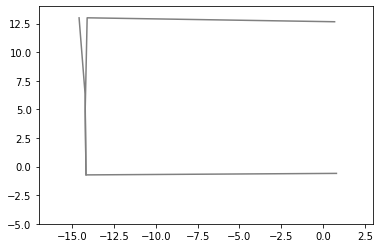

In [120]:
#  np.array(((-2, 5.8566027), (-6.5902743, 0.065724367), (-6.5553084, 1.1867515), (15.10717, 5.5659299)))
%matplotlib inline
x1 = np.array((0.793, -14.167, -14.222, -14.580))
y1= np.array((-0.595, -0.727, 6.359, 12.995))
x2 = np.array((-14.167, -14.216, -14.098, 0.683))
y2 = np.array((-0.727, 4.893, 13.000, 12.656))
plt.plot(x1, y1, color="gray")
plt.plot(x2, y2, color="gray")
plt.xlim(-17, 3)
plt.ylim(-5, 14)

In [334]:
len(predicted_trajs_reshaped5[:, 0])

27

<IPython.core.display.Javascript object>


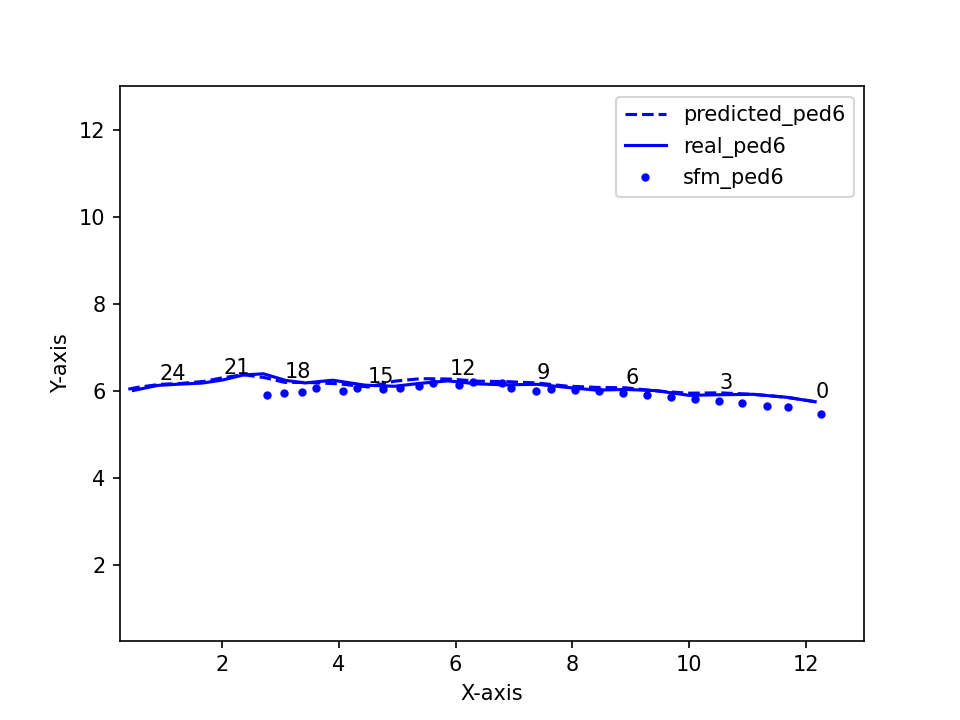

In [154]:
plt.plot(predicted_trajs_reshaped5[:, 0], predicted_trajs_reshaped5[:, 1], '--', label='predicted_ped6', color= "blue")
plt.plot(real_trajs_reshaped5[:, 0], real_trajs_reshaped5[:, 1], label='real_ped6', color="blue")
plt.plot(plot_x_sfm5[:len(predicted_trajs_reshaped5[:, 0])], plot_y_sfm5[:len(predicted_trajs_reshaped5[:, 0])], ".", 
         label='sfm_ped6', color='blue')
for x in range(0, len(predicted_trajs_reshaped5), 3):
    plt.text(predicted_trajs_reshaped5[x:x+1, 0], predicted_trajs_reshaped5[x:x+1, 1], str(x), horizontalalignment='left',
            verticalalignment='bottom')

# plt.plot(x1, y1, x2, y2, color="purple")
# plt.plot(x2, y2, color="gray")
# plt.show()

plt.ylim(0.25, 13)
plt.xlim(0.25, 13)
plt.legend()
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.show()

<IPython.core.display.Javascript object>


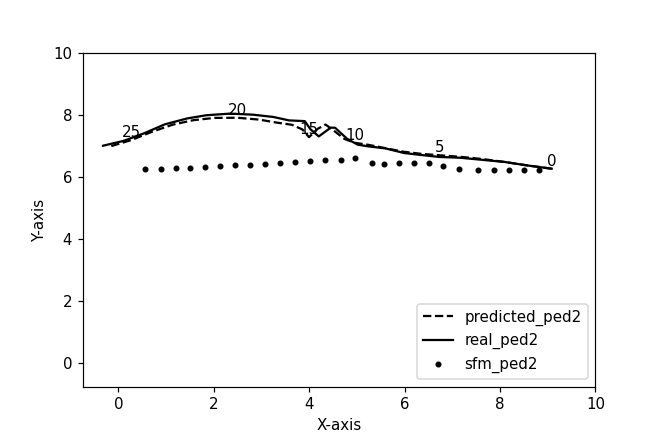

In [187]:
%matplotlib notebook
plt.plot(predicted_trajs_reshaped1[:, 0], predicted_trajs_reshaped1[:, 1], '--', label='predicted_ped2', color= "black")
plt.plot(real_trajs_reshaped1[:, 0], real_trajs_reshaped1[:, 1], label='real_ped2', color="black")
plt.plot(plot_x_sfm1[:len(predicted_trajs_reshaped1[:, 0])], plot_y_sfm1[:len(predicted_trajs_reshaped1[:, 0])],
         ".", label='sfm_ped2', color='black')
for x in range(0, len(predicted_trajs_reshaped1), 5):
    plt.text(predicted_trajs_reshaped1[x:x+1, 0], predicted_trajs_reshaped1[x:x+1, 1], str(x), horizontalalignment='center', 
             verticalalignment='bottom')
    
# plt.plot(x1, y1, x2, y2, color="purple")
# plt.plot(x2, y2, color="gray")
# plt.show()

plt.ylim(-0.75, 10)
plt.xlim(-0.75, 10)
plt.legend(loc=4)
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.show()

<IPython.core.display.Javascript object>


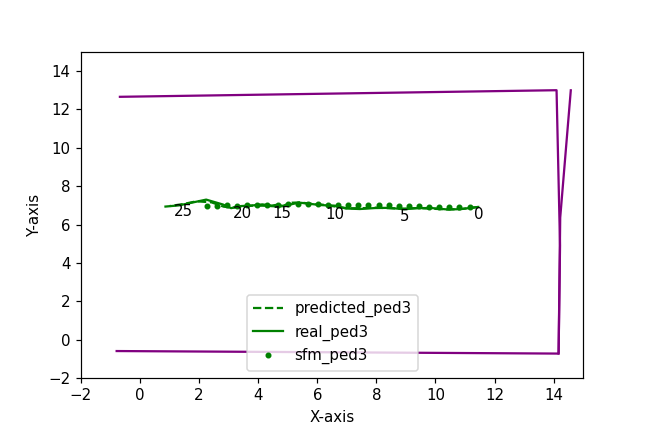

In [325]:
plt.plot(predicted_trajs_reshaped2[:, 0], predicted_trajs_reshaped2[:, 1], '--', label='predicted_ped3', color= "green")
plt.plot(real_trajs_reshaped2[:, 0], real_trajs_reshaped2[:, 1], label='real_ped3', color="green")
plt.plot(plot_x_sfm2[:len(predicted_trajs_reshaped2[:, 0])], plot_y_sfm2[:len(predicted_trajs_reshaped2[:, 0])],
         ".", label='sfm_ped3', color='green')
for x in range(0, len(predicted_trajs_reshaped2), 5):
    plt.text(predicted_trajs_reshaped2[x:x+1, 0], predicted_trajs_reshaped2[x:x+1, 1], str(x), horizontalalignment='center', 
             verticalalignment='top')
    
plt.plot(-x1, y1, -x2, y2, color="purple")
# plt.plot(x2, y2, color="gray")
# plt.show()

plt.ylim(-2, 15)
plt.xlim(-2, 15)
plt.legend()
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.show()

<IPython.core.display.Javascript object>


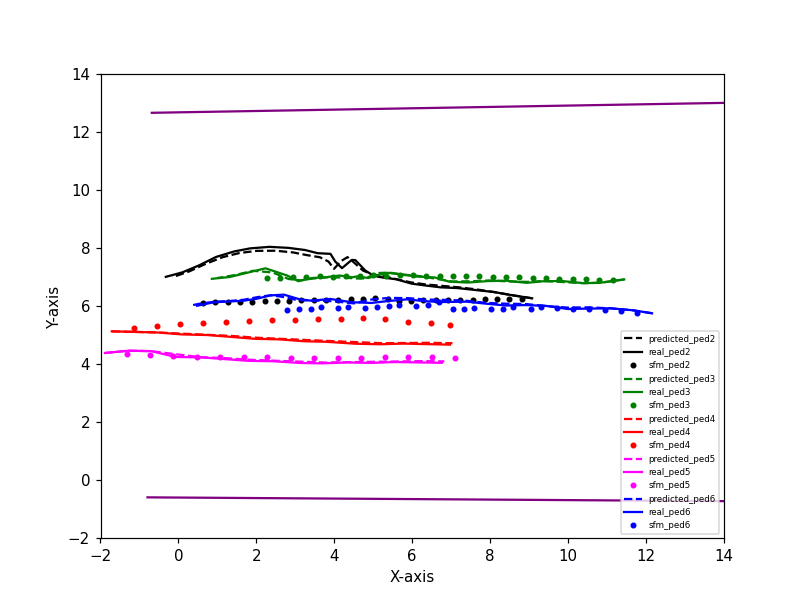

In [328]:
# Real, predicted and SFM trajectories for pedestrian all pedestrian in scenario
%matplotlib notebook
plt.plot(predicted_trajs_reshaped1[:, 0], predicted_trajs_reshaped1[:, 1], '--', label='predicted_ped2', color= "black")
plt.plot(real_trajs_reshaped1[:, 0], real_trajs_reshaped1[:, 1], label='real_ped2', color="black")
plt.plot(plot_x_sfm1[:len(predicted_trajs_reshaped1[:, 0])], plot_y_sfm1[:len(predicted_trajs_reshaped1[:, 0])],
         ".", label='sfm_ped2', color='black')

plt.plot(predicted_trajs_reshaped2[:, 0], predicted_trajs_reshaped2[:, 1], '--', label='predicted_ped3', color= "green")
plt.plot(real_trajs_reshaped2[:, 0], real_trajs_reshaped2[:, 1], label='real_ped3', color="green")
plt.plot(plot_x_sfm2[:len(predicted_trajs_reshaped2[:, 0])], plot_y_sfm2[:len(predicted_trajs_reshaped2[:, 0])], ".", 
         label='sfm_ped3', color='green')

plt.plot(predicted_trajs_reshaped3[:, 0], predicted_trajs_reshaped3[:, 1], '--', label='predicted_ped4', color= "red")
plt.plot(real_trajs_reshaped3[:, 0], real_trajs_reshaped3[:, 1], label='real_ped4', color="red")
plt.plot(plot_x_sfm3[:len(predicted_trajs_reshaped3[:, 0])], plot_y_sfm3[:len(predicted_trajs_reshaped3[:, 0])], ".", 
         label='sfm_ped4', color='red')

plt.plot(predicted_trajs_reshaped4[:, 0], predicted_trajs_reshaped4[:, 1], '--', label='predicted_ped5', color= "magenta")
plt.plot(real_trajs_reshaped4[:, 0], real_trajs_reshaped4[:, 1], label='real_ped5', color="magenta")
plt.plot(plot_x_sfm4[:len(predicted_trajs_reshaped4[:, 0])], plot_y_sfm4[:len(predicted_trajs_reshaped4[:, 0])], ".", 
         label='sfm_ped5', color='magenta')

plt.plot(predicted_trajs_reshaped5[:, 0], predicted_trajs_reshaped5[:, 1], '--', label='predicted_ped6', color= "blue")
plt.plot(real_trajs_reshaped5[:, 0], real_trajs_reshaped5[:, 1], label='real_ped6', color="blue")
plt.plot(plot_x_sfm5[:len(predicted_trajs_reshaped5[:, 0])], plot_y_sfm5[:len(predicted_trajs_reshaped5[:, 0])], ".", 
         label='sfm_ped6', color='blue')

# plt.plot(predicted_trajs_reshaped7[:, 0], predicted_trajs_reshaped7[:, 1], '--', label='predicted_ped7', color= "olive")
# plt.plot(real_trajs_reshaped7[:, 0], real_trajs_reshaped7[:, 1], label='real_ped7', color="olive")
# plt.plot(plot_x_sfm6[:len(predicted_trajs_reshaped7[:, 0])], plot_y_sfm6[:len(predicted_trajs_reshaped7[:, 0])], ".", 
 #        label='sfm_ped7', color='olive')

# plt.plot(predicted_trajs_reshaped8[:, 0], predicted_trajs_reshaped8[:, 1], '--', label='predicted_ped8', color= "orange")
# plt.plot(real_trajs_reshaped8[:, 0], real_trajs_reshaped8[:, 1], label='real_ped8', color="orange")
# plt.plot(plot_x_sfm7[:len(predicted_trajs_reshaped8[:, 0])], plot_y_sfm7[:len(predicted_trajs_reshaped8[:, 0])], ".", 
#         label='sfm_ped8', color='orange')

# plt.plot(x1, y1, color="gray")
# plt.plot(x2, y2, color="gray")
plt.plot(-x1, y1, -x2, y2, color="purple")

plt.xlim(-2, 14)
plt.ylim(-2, 14)
plt.legend(fontsize='xx-small', loc=4)
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
# plt.savefig("eth_data_casestudy_all_ped_final.jpg")
plt.show()

In [242]:
len(x_plot)

24

In [271]:
plt.rcParams['text.usetex'] = False

<IPython.core.display.Javascript object>


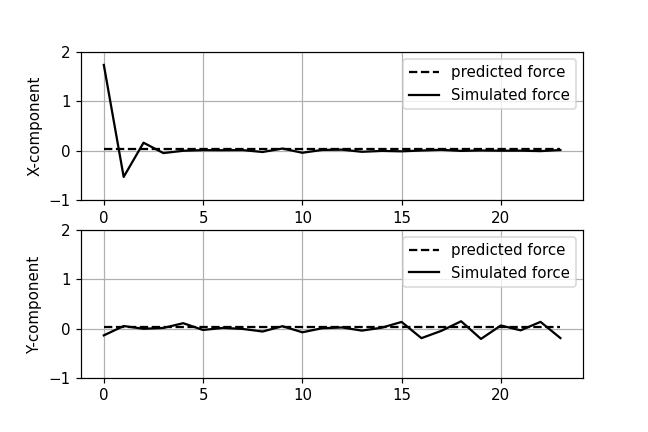

In [311]:
# plt.rcParams['text.usetex'] = True
x_plot = np.linspace(0, len(force_pred_reshaped[:, 0]) - 1, num=24)
# print(x_plot)
fig, axs = plt.subplots(2)

axs[0].plot(x_plot, force_pred_reshaped[:, 0], "--", label='predicted force', color= "black")
axs[0].plot(x_plot, plot_force_x_sfm2[:len(x_plot)], label='Simulated force', color='black')
# axs[0].plot(x_plot, plot_force_x_sfm_total[10:], label='sfm smulated force', color='black')

axs[1].plot(x_plot, force_pred_reshaped[:, 1], "--", label='predicted force', color= "black")
axs[1].plot(x_plot, plot_force_y_sfm2[:len(x_plot)], label='Simulated force', color='black')
# axs[1].plot(x_plot, plot_force_y_sfm_total[10:], label='sfm smulated force', color='black')

axs[0].set_ylim(-1, 2)
axs[1].set_ylim(-1, 2)
axs[0].legend(loc='upper right')
axs[1].legend(loc='upper right')
axs[0].set(ylabel='X-component')
axs[1].set(ylabel='Y-component')
axs[0].grid()
axs[1].grid()
# axs[0].set_title(r"\frac{d\overrightarrow{v_{\alpha}}(t)}{dt}")
plt.show()

<IPython.core.display.Javascript object>


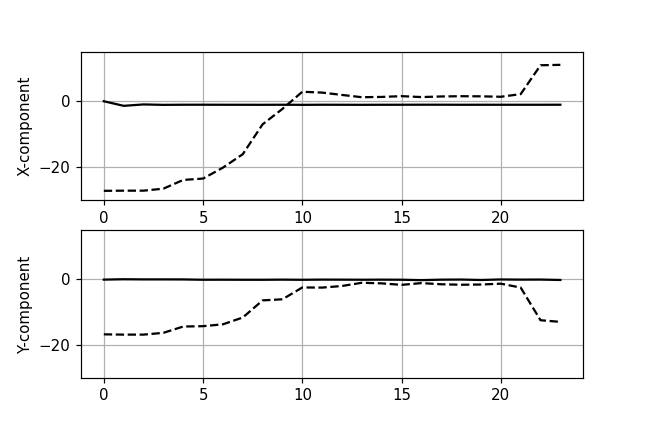

In [316]:
# force_pred_reshaped, force_pred_attract_reshaped, force_pred_repulse_reshaped, force_pred_ped_reshaped, 
# force_pred_group_reshaped
# ped3
x_plot = np.linspace(0, len(force_pred_reshaped[:, 0]) - 1, num=24)
fig, axs = plt.subplots(2)
# fig.suptitle('Acceleration Force')
axs[0].plot(x_plot, force_pred_attract_reshaped[:, 0], "--", label='predicted force', color= "black")
axs[0].plot(x_plot, plot_att_x_sfm2[:len(x_plot)], label='Simulated force', color='black')
# axs[0].plot(x_plot, plot_force_x_sfm_attract[10:], label='sfm smulated force', color='black')

axs[1].plot(x_plot, force_pred_attract_reshaped[:, 1], "--", label='predicted force', color= "black")
axs[1].plot(x_plot, plot_att_y_sfm2[:len(x_plot)], label='Simulated force', color='black')
# axs[1].plot(x_plot, plot_force_y_sfm_attract[10:], label='sfm smulated force', color='black')

axs[0].set_ylim(-30, 15)
axs[1].set_ylim(-30, 15)
# axs[0].legend(loc='lower right')
# axs[1].legend(loc='upper right')
axs[0].set(ylabel='X-component')
axs[1].set(ylabel='Y-component')
axs[0].grid()
axs[1].grid()

In [281]:
plot_bound_x_sfm1[:len(x_plot)]

array([4.74305427e-22, 1.17678791e-21, 4.25922917e-21, 1.33515983e-20,
       4.24232569e-20, 1.29909451e-19, 3.88360881e-19, 1.12585867e-18,
       3.16217361e-18, 8.57104297e-18, 2.23930471e-17, 5.58502000e-17,
       1.46208990e-16, 4.23932865e-16, 8.75281562e-16, 1.82385653e-15,
       3.50085450e-15, 6.34002483e-15, 1.06837479e-14, 1.67168063e-14,
       2.40607019e-14, 3.16476694e-14, 3.76072023e-14, 3.97430396e-14])

<IPython.core.display.Javascript object>


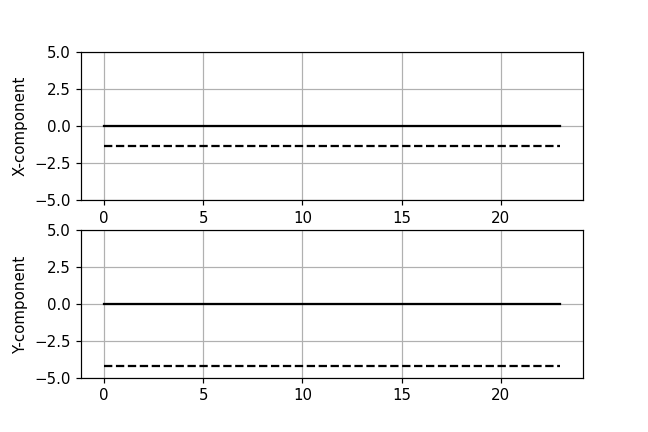

In [317]:
# force_pred_reshaped, force_pred_attract_reshaped, force_pred_repulse_reshaped, force_pred_ped_reshaped, 
# force_pred_group_reshaped
x_plot = np.linspace(0, len(force_pred_reshaped[:, 0]) - 1, num=24)
fig, axs = plt.subplots(2)
# fig.suptitle('Repulsive Force from Boundaries')
axs[0].plot(x_plot, force_pred_repulse_reshaped[:, 0], "--", label='predicted force', color= "black")
axs[0].plot(x_plot, plot_bound_x_sfm2[:len(x_plot)], label='Simulated force', color='black')
# axs[0].plot(x_plot, plot_force_x_sfm_bound[10:], label='sfm smulated force', color='black')

axs[1].plot(x_plot, force_pred_repulse_reshaped[:, 1], "--", label='predicted force', color= "black")
axs[1].plot(x_plot, plot_bound_y_sfm2[:len(x_plot)], label='Simulated force', color='black')
# axs[1].plot(x_plot, plot_force_y_sfm_bound[10:], label='sfm smulated force', color='black')

axs[0].set_ylim(-5, 5)
axs[1].set_ylim(-5, 5)
# axs[0].set_xlim(-3, 3)
# axs[1].set_xlim(-3, 3)
# axs[0].legend(loc='upper right')
# axs[1].legend(loc='upper right')
axs[0].set(ylabel='X-component')
axs[1].set(ylabel='Y-component')
axs[0].grid()
axs[1].grid()

<IPython.core.display.Javascript object>


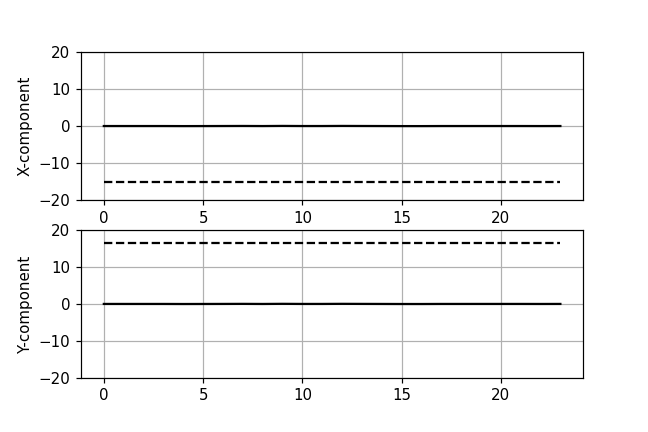

In [318]:
# force_pred_reshaped, force_pred_attract_reshaped, force_pred_repulse_reshaped, force_pred_ped_reshaped, 
# force_pred_group_reshaped
x_plot = np.linspace(0, len(force_pred_reshaped[:, 0]) - 1, num=24)
fig, axs = plt.subplots(2)
# fig.suptitle('Repulsive Force from other Pedestrians')
axs[0].plot(x_plot, force_pred_ped_reshaped[:, 0], "--", label='predicted force', color= "black")
axs[0].plot(x_plot, plot_ped_x_sfm2[:len(x_plot)], label='Simulated force', color='black')
# axs[0].plot(x_plot, plot_force_x_sfm_ped[10:], label='sfm smulated force', color='black')

axs[1].plot(x_plot, force_pred_ped_reshaped[:, 1], "--", label='predicted force', color= "black")
axs[1].plot(x_plot, plot_ped_y_sfm2[:len(x_plot)], label='Simulated force', color='black')
# axs[1].plot(x_plot, plot_force_y_sfm_ped[10:], label='sfm smulated force', color='black')

axs[0].set_ylim(-20, 20)
axs[1].set_ylim(-20, 20)
# axs[0].legend()
# axs[1].legend()
axs[0].set(ylabel='X-component')
axs[1].set(ylabel='Y-component')
axs[0].grid()
axs[1].grid()

<IPython.core.display.Javascript object>


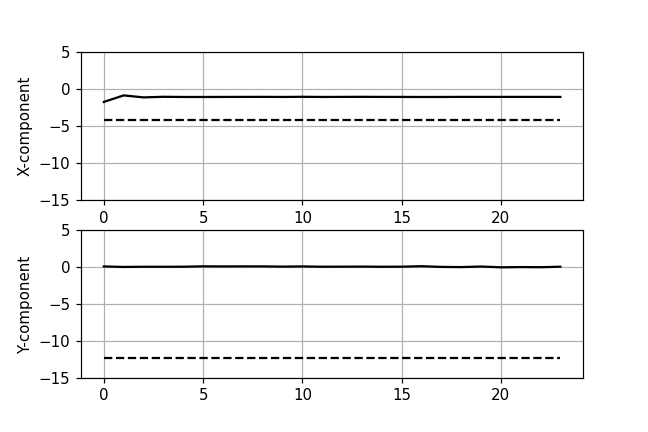

In [319]:
# force_pred_reshaped, force_pred_attract_reshaped, force_pred_repulse_reshaped, force_pred_ped_reshaped, 
# force_pred_group_reshaped
x_plot = np.linspace(0, len(force_pred_reshaped[:, 0]) - 1, num=24)
fig, axs = plt.subplots(2)
# fig.suptitle('Group Force')
axs[0].plot(x_plot, force_pred_group_reshaped[:, 0], "--", label='predicted force', color= "black")
axs[0].plot(x_plot, plot_gr_x_sfm2[:len(x_plot)], label='Simulated force', color='black')
# axs[0].plot(x_plot, plot_force_x_sfm_group[10:], label='sfm smulated force', color='black')

axs[1].plot(x_plot, force_pred_group_reshaped[:, 1], "--", label='predicted force', color= "black")
axs[1].plot(x_plot, plot_gr_y_sfm2[:len(x_plot)], label='Simulated force', color='black')
# axs[1].plot(x_plot, plot_force_y_sfm_group[10:], label='sfm smulated force', color='black')

axs[0].set_ylim(-15, 5)
axs[1].set_ylim(-15, 5)
# axs[0].legend()
# axs[1].legend()
axs[0].set(ylabel='X-component')
axs[1].set(ylabel='Y-component')
axs[0].grid()
axs[1].grid()

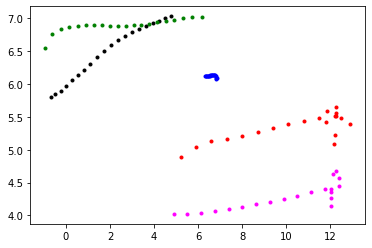

In [255]:
plt.plot(plot_x_sfm1, plot_y_sfm1, ".", label='sfm_ped2', color='black')
plt.plot(plot_x_sfm2, plot_y_sfm2, ".", label='sfm_ped3', color='green')
plt.plot(plot_x_sfm3, plot_y_sfm3, ".", label='sfm_ped4', color='red')
plt.plot(plot_x_sfm4, plot_y_sfm4, ".", label='sfm_ped5', color='magenta')
plt.plot(plot_x_sfm5, plot_y_sfm5, ".", label='sfm_ped6', color='blue')
plt.show()


In [248]:
plot_x_sfm5

array([6.83686283, 6.82749444, 6.81747303, 6.79679213, 6.76317951,
       6.73119978, 6.70052833, 6.67025425, 6.64007293, 6.6099089 ,
       6.57974684, 6.54958446, 6.51942173, 6.48925883, 6.45909585,
       6.42893285, 6.39876984, 6.36860683, 6.33844382, 6.3082808 ,
       6.27811779, 6.24795478, 6.21779177, 6.18762875, 6.15746574,
       6.12730273, 6.09713972, 6.06697671, 6.0368137 , 6.00665069,
       5.97648768, 5.94632467, 5.91616166, 5.88599864, 5.85583563,
       5.82567262, 5.79550961, 5.7653466 , 5.7351836 , 5.70502059])

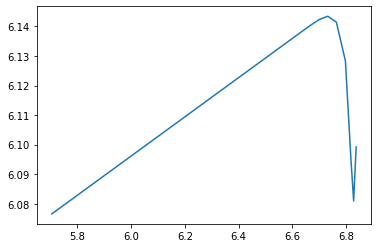

In [211]:
plt.plot(plot_x_sfm, plot_y_sfm)

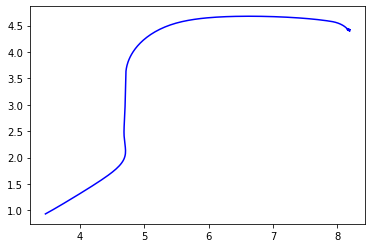

In [989]:
plt.plot(real_trajs_reshaped[:, 0], real_trajs_reshaped[:, 1], label='real', color="blue")

In [638]:
position_list2 = np.reshape(next_position_list, (50, 2))
# position_list2

In [673]:
len(predicted_trajs.flatten())/2

250.0

In [639]:
position_list3 = np.concatenate((input_xy[:10].flatten(), position_list2.flatten()))
position_list3 = np.reshape(position_list3, (60,2))
# position_list3


In [627]:
print(plot_x[:1], "\n\n", plot_y[:1])

[8.2096709] 

 [5.32886629]
